<a href="https://colab.research.google.com/github/JulioVianaDev/PythonChallenge/blob/main/Tatic_oficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
#library installation
import pandas as pd

In [117]:
#creating variables to allocate csv
students_mat = pd.read_csv('student-mat.csv',sep=';')
students_por = pd.read_csv('student-por.csv',sep=';')

In [118]:
#checking the tables
students_mat.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1       GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2       GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3       GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4       GP   F   16       U     GT3       T  ...     2       5        4   6  10  10
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
390     MS   M   20       U     LE3       A  ...     5       4       11   9   9   9
391     MS   M   17       U     LE3       T  ...     4       2        3  14  16  16
392     MS   M   21       R     GT3       T  ...     3       3        3  10   8   7
393     MS   M   18       R     LE3       T  ...     4       5        0  11  12  10
394     MS   M   19       U     LE3       T  .

In [119]:
students_por.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        4   0  11  11
1       GP   F   17       U     GT3       T  ...     1       3        2   9  11  11
2       GP   F   15       U     LE3       T  ...     3       3        6  12  13  12
3       GP   F   15       U     GT3       T  ...     1       5        0  14  14  14
4       GP   F   16       U     GT3       T  ...     2       5        0  11  13  13
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
644     MS   F   19       R     GT3       T  ...     2       5        4  10  11  10
645     MS   F   18       U     LE3       T  ...     1       1        4  15  15  16
646     MS   F   18       U     GT3       T  ...     1       5        6  11  12   9
647     MS   M   17       U     LE3       T  ...     4       2        6  10  10  10
648     MS   M   18       R     LE3       T  .

In [120]:
#checking null values
students_mat.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [121]:
students_por.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [122]:
#looking at the size
len(students_mat),len(students_por)

(395, 649)

In [123]:
#making the dataframe
merged_df = pd.merge(left= students_por,right= students_mat,
                     on= ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"],
                     how ='inner',
                     suffixes = ('_port','_mat')
                     )

In [124]:
merged_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,mother,1,2,3,yes,no,yes,no,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,mother,1,3,0,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,father,1,2,0,no,yes,yes,no,yes,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,no,yes,yes,yes,yes,yes,4,4,3,2,2,5,4,7,9,10,mother,3,1,0,no,yes,yes,yes,yes,yes,4,4,3,2,2,5,7,6,5,6
378,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,mother,1,3,1,no,no,no,yes,yes,no,5,4,2,1,2,5,0,7,5,0
379,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,mother,1,2,0,no,yes,yes,no,yes,no,4,3,4,1,1,1,0,7,9,8
380,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,mother,2,1,0,no,no,no,no,yes,no,2,4,5,3,4,2,3,14,16,16


1- Os Coodernadores Disciplinares precisam identificar quais alunos tiveram as notas maiores que 10 no primeiro período (G1) em ambas disciplinas e que a mãe seja professora (teacher).

In [125]:
tarefa1 = merged_df[(merged_df['G1_port']>10) & (merged_df['G1_mat']>10) &(merged_df['Mjob']=='teacher')]
len(tarefa1)

29

2- Gerar um relatório de alunos que tiveram notas inferiores a 6 nos dois primeiros períodos, G1 e G2 e que tenha a mãe como professora.

On this question i have an opinion,i'll demonstrate the solution i verified,but it's a difficult roleplaying challenge, so since I didn't know which way was right, I'll demonstrate the 2 possible solutions

the first was what left me a little perplexed,if I try to look up the values ​​by summing all the conditions the result is 0, now I will show you why

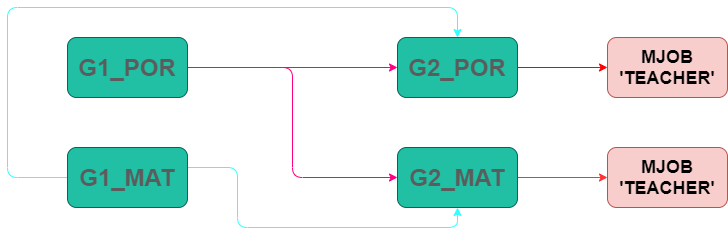

If we add the conditions, we have to create 4 dataframes and then join the possibilities

In [126]:
poss1df = merged_df[(merged_df['G1_port']<6) & (merged_df['G2_port']<6) & (merged_df['Mjob']=='teacher')]
poss2df = merged_df[(merged_df['G1_port']<6) & (merged_df['G2_mat'])<6 & (merged_df['Mjob']=='teacher')]
poss3df = merged_df[(merged_df['G1_mat']<6) & (merged_df['G2_mat'])<6 & (merged_df['Mjob']=='teacher')]
poss4df = merged_df[(merged_df['G1_mat']<6) & (merged_df['G2_port'])<6 & (merged_df['Mjob']=='teacher')]

however I noticed that if we add as the conditions there is not a single student who has the 3,but i need show manually

In [127]:
poss1df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat


In [128]:
poss2df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat


In [129]:
poss3df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat


In [130]:
poss4df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat


as we see the 4 empty dataframe returns, let's look at the conditions, one by one

In [131]:
check1 = merged_df[(merged_df['G1_port']<6)]
check1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,6,5,6,6
374,MS,M,19,R,GT3,T,1,1,other,services,other,mother,2,1,1,no,no,no,no,yes,yes,no,no,4,3,2,1,3,5,0,5,8,0,mother,2,1,1,no,no,no,no,yes,no,4,3,2,1,3,5,0,6,5,0


as seen with the naked eye, it is possible to see that "Mjob" is not a 'teacher'

In [132]:
check2 = merged_df[(merged_df['G1_mat']<6)]
check2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,4,5,5,6
79,GP,M,17,U,GT3,T,2,1,other,other,home,mother,2,1,3,yes,yes,no,yes,yes,no,yes,no,4,5,1,1,1,3,0,9,9,10,mother,1,1,3,no,yes,no,no,yes,no,5,4,5,1,2,5,0,5,0,0
81,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,0,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,22,9,7,6,mother,1,1,3,no,yes,no,no,yes,no,5,4,5,1,2,5,0,5,0,0
82,GP,F,16,U,GT3,T,3,4,at_home,other,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,2,4,3,1,2,3,14,12,11,11,mother,1,2,0,no,yes,no,no,yes,no,2,4,3,1,2,3,12,5,5,5
145,GP,F,16,U,GT3,A,3,3,other,other,course,other,2,1,0,no,yes,no,yes,no,yes,yes,yes,4,3,2,1,1,5,4,9,9,10,other,2,1,2,no,yes,no,yes,yes,yes,4,3,2,1,1,5,0,4,0,0
161,GP,M,19,U,GT3,T,3,2,services,at_home,home,mother,1,1,0,no,yes,no,no,yes,no,yes,yes,4,5,4,1,1,4,6,11,9,11,mother,1,1,3,no,yes,no,no,no,yes,4,5,4,1,1,4,0,5,0,0
169,GP,M,17,R,LE3,T,1,1,other,services,course,mother,4,2,0,no,no,no,yes,yes,no,no,yes,5,3,5,1,5,5,0,8,8,8,mother,4,2,3,no,no,no,yes,no,yes,5,3,5,1,5,5,0,5,8,7
252,GP,M,18,R,LE3,T,3,3,other,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,yes,4,3,3,1,3,5,8,10,9,10,mother,1,2,1,no,yes,no,no,yes,yes,4,3,3,1,3,5,8,3,5,5


again the same error

In [133]:
check3 = merged_df[(merged_df['G2_port']<6)]
check3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat
362,MS,F,18,R,GT3,T,4,4,other,teacher,other,father,3,2,0,no,yes,no,no,no,yes,yes,yes,3,2,2,4,2,5,0,7,5,0,father,3,2,0,no,yes,yes,no,yes,yes,3,2,2,4,2,5,10,14,12,11


the father is a teacher, but that's not what we want

In [134]:
check4 = merged_df[(merged_df['G2_mat']<6)]
check4

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,4,5,5,6
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13,mother,2,2,0,yes,yes,no,no,yes,no,4,1,4,1,1,1,6,6,5,6
18,GP,M,17,U,GT3,T,3,2,services,services,course,mother,1,1,3,no,yes,yes,yes,yes,yes,yes,no,5,5,5,2,4,5,2,8,8,7,mother,1,1,3,no,yes,no,yes,yes,no,5,5,5,2,4,5,16,6,5,5
79,GP,M,17,U,GT3,T,2,1,other,other,home,mother,2,1,3,yes,yes,no,yes,yes,no,yes,no,4,5,1,1,1,3,0,9,9,10,mother,1,1,3,no,yes,no,no,yes,no,5,4,5,1,2,5,0,5,0,0
81,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,0,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,22,9,7,6,mother,1,1,3,no,yes,no,no,yes,no,5,4,5,1,2,5,0,5,0,0
82,GP,F,16,U,GT3,T,3,4,at_home,other,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,2,4,3,1,2,3,14,12,11,11,mother,1,2,0,no,yes,no,no,yes,no,2,4,3,1,2,3,12,5,5,5
138,GP,F,15,R,GT3,T,3,4,services,teacher,course,father,2,3,0,no,yes,no,no,yes,yes,yes,yes,4,2,2,2,2,5,0,10,11,12,father,2,3,2,no,yes,no,no,yes,yes,4,2,2,2,2,5,0,12,0,0
139,GP,F,15,U,GT3,T,1,1,at_home,other,course,mother,3,1,0,no,yes,no,yes,no,yes,yes,yes,4,3,3,1,2,4,6,11,12,13,mother,3,1,0,no,yes,no,yes,yes,yes,4,3,3,1,2,4,0,8,0,0
142,GP,M,15,R,GT3,T,3,4,at_home,teacher,course,mother,4,2,0,no,yes,no,no,yes,yes,no,yes,5,3,3,1,1,5,2,12,11,11,mother,4,2,0,no,yes,no,no,yes,yes,5,3,3,1,1,5,0,9,0,0
143,GP,F,15,U,GT3,T,4,4,services,at_home,course,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,4,3,3,1,1,5,4,13,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,4,3,3,1,1,5,0,11,0,0


when we finally found a student with a grade lower than 6 and a teacher mother, he got good grades in the first semester (g1)

After thinking it over, I thought maybe it was a Portuguese joke, so maybe instead of "e" it was an "or".
So I will put all students who have grades lower than 6, in any subject, both in the first period and in the second, and of course with the mother as teacher

In [135]:
mode2_1 = merged_df[(merged_df['G1_mat']<6)& (merged_df['Mjob']=='teacher') ]
mode2_1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat


In [136]:
mode2_2 = merged_df[(merged_df['G1_port']<6)& (merged_df['Mjob']=='teacher') ]
mode2_2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat


In [137]:
mode2_3 = merged_df[(merged_df['G2_mat']<6)& (merged_df['Mjob']=='teacher') ]
mode2_3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat
245,GP,M,16,U,LE3,T,4,3,teacher,other,course,mother,1,1,0,no,no,no,yes,no,yes,yes,no,5,4,5,1,1,3,7,14,14,15,mother,1,1,0,no,no,no,yes,yes,no,5,4,5,1,1,3,0,6,0,0
377,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,no,yes,yes,yes,yes,yes,4,4,3,2,2,5,4,7,9,10,mother,3,1,0,no,yes,yes,yes,yes,yes,4,4,3,2,2,5,7,6,5,6


In [138]:
mode2_4 = merged_df[(merged_df['G2_port']<6)& (merged_df['Mjob']=='teacher') ]
mode2_4

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,nursery,higher_port,internet,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,higher_mat,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat


well this way we list 2 students, so at least it's already a result

3- Listar o porcentagem de alunos que tiveram ajuda extra-curricular segmentado por colégios.

for this task, i created a simple split account, dividing the number of students who had help by the total number.

In [139]:
decimal = merged_df[(merged_df['paid_port']=='yes')|(merged_df['paid_mat']=='yes')].groupby(['school']).count()/merged_df.groupby(['school']).count()
porcentagem = decimal.iloc[0,1]

In [140]:
porcentagem = porcentagem *100

In [141]:
porcentagem

49.41520467836257

4- Revisar o modelo e adicionar alguma informação que seja relevante aos Coodernadores Disciplinares.

In [142]:
merged_df['Average_port'] = (merged_df['G1_port'] + merged_df['G2_port'] + merged_df['G3_port']) /3

In [143]:
merged_df['Average_mat'] = (merged_df['G1_mat'] + merged_df['G2_mat'] +merged_df['G3_mat']) / 3

# Now I will display the answers

In [144]:
print(f'Now, the answers')

Now, the answers


In [145]:
print(f'The first exercise, exist {len(tarefa1)} students,to view them, type "tarefa1" in your notebook')
resposta1 = input()
if resposta1 =="tarefa1":
  print(tarefa1)

The first exercise, exist 29 students,to view them, type "tarefa1" in your notebook
tarefa1
    school sex  age address  ... absences_mat G1_mat  G2_mat  G3_mat
20      GP   M   15       U  ...            0     13      14      15
22      GP   M   16       U  ...            2     15      15      16
32      GP   M   15       R  ...            0     17      16      16
36      GP   M   15       U  ...            2     15      16      18
48      GP   M   15       U  ...            2     15      15      14
57      GP   M   15       U  ...            4     14      15      15
65      GP   F   16       U  ...            2     16      15      15
76      GP   M   15       U  ...            8     11      11      10
96      GP   F   16       U  ...            0     11      10      10
116     GP   M   15       U  ...            6     18      19      19
119     GP   M   15       U  ...           10     18      19      19
121     GP   M   16       U  ...            2     15      15      16
137     GP 

the second exercise is the one for which the value was equivalent to 0, but in the second method explained above, the answer was 2 students

In [146]:
print(f'the possible answer of the 2 exercise is  2 student but if you want see press "tarefa2" ')
tarefa2 = input()
if tarefa2 =="tarefa2":
  print(mode2_3)

the possible answer of the 2 exercise is  2 student but if you want see press "tarefa2" 
tarefa2
    school sex  age address  ... absences_mat G1_mat  G2_mat  G3_mat
245     GP   M   16       U  ...            0      6       0       0
377     MS   F   18       R  ...            7      6       5       6

[2 rows x 53 columns]


Third exercise

In [147]:
print(f'Third exercise, press "tarefa3" for see a percentage')
tarefa3 = input()
if tarefa3 =="tarefa3":
  print(f'{porcentagem} %')

Third exercise, press "tarefa3" for see a percentage
tarefa3
49.41520467836257 %


**fourth** exercise

In [148]:
print(f'My advice to reviewers is to organize student names to make classifying students, but for help the teachers, I set up the average of Portuguese and math students.')

My advice to reviewers is to organize student names to make classifying students, but for help the teachers, I set up the average of Portuguese and math students.


In [149]:
print(f'Third exercise, press "tarefa4_port" for see the average_port')
tarefa4 = input()
if tarefa4 =="tarefa4_port":
  print(merged_df['Average_port'])

Third exercise, press "tarefa4_port" for see the average_port
tarefa4_port
0       7.333333
1      10.333333
2      12.333333
3      14.000000
4      12.333333
         ...    
377     8.666667
378    10.333333
379    15.333333
380    10.000000
381    10.666667
Name: Average_port, Length: 382, dtype: float64


In [151]:

print(f'Third exercise, press "tarefa4_mat" for see the average_mat')
tarefa5 = input()
if tarefa5 =="tarefa4_mat":
  print(merged_df['Average_mat'])

Third exercise, press "tarefa4_mat" for see the average_mat
tarefa4_mat
0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
377     5.666667
378     4.000000
379     8.000000
380    15.333333
381    11.000000
Name: Average_mat, Length: 382, dtype: float64
